# Author : Sharukh Mulani

# Problem Statement

We have student dataset

Objective is to Predict the percentage of an student based on the no. of study hours.

What will be predicted score if a student studies for 9.25 hrs/ day?

## Data Collection

In [1]:
# Import All Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
# Import Dataset

df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Preprocessing

In [7]:
columns = list(df.columns)

In [8]:
x = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

## Data Visualisation

Text(0.5, 1.0, 'Hours vs Scores')

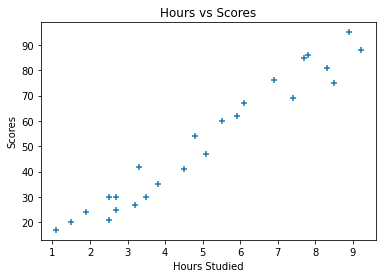

In [9]:
# Check relation between Hours studied by student and his scores
plt.scatter(x, y, marker = '+')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Hours vs Scores')

In above graph, we can see linear relation between number of hours studied and percentage of score. 

# Build A Model

In [10]:
# split this data into training and test sets

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
# By using training and testing dataset, we have to train our model

Lr_model = LinearRegression()
Lr_model.fit(x_train, y_train)

LinearRegression()

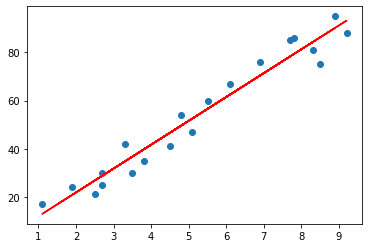

In [13]:
# Plot the Regression_Line 
line = Lr_model.coef_*x+Lr_model.intercept_
plt.scatter(x_train,y_train )
plt.plot(x,line,color="red")
plt.show()

In [18]:
# make some predictions

y_pred = Lr_model.predict(x_test)

In [19]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [20]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Hours': x_test.reshape(1,-1)[0], 'Actual': y_test.reshape(1,-1)[0], 'Predicted': y_pred.reshape(1,-1)[0]})
df

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [22]:
#Sort the data based on hours
df_sorted=df.sort_values(by="Hours")
df_sorted

,Hours,Actual,Predicted
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


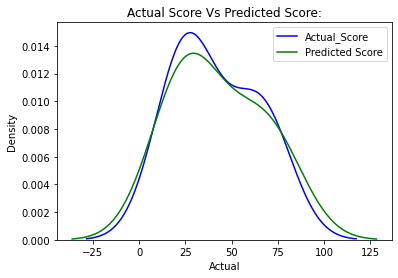

In [23]:
# Visualizing the accuracy of the model
a=sns.kdeplot(df_sorted["Actual"],color="blue",label="Actual_Score")
b=sns.kdeplot(df_sorted["Predicted"],color="green",label="Predicted Score")
plt.legend()
plt.title("Actual Score Vs Predicted Score:")
plt.show()

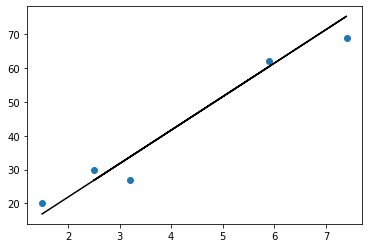

In [24]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c = 'black')

In [25]:
print('Mean absolute Error: ',  mean_absolute_error(y_test,y_pred))
print("Correlation=", r2_score(y_train,Lr_model.predict(x_train)))
print('accuracy: ', r2_score(y_test,y_pred))

Mean absolute Error:  4.183859899002975
Correlation= 0.9515510725211552
accuracy:  0.9454906892105356


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [26]:
pred_score = Lr_model.predict([[9.25]])
print('The predicted score if a student studies for 9.25 hrs/day is',pred_score[0])

The predicted score if a student studies for 9.25 hrs/day is [93.69173249]
